[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/pinecone-io/examples/blob/master/docs/rag-getting-started.ipynb) [![Open nbviewer](https://raw.githubusercontent.com/pinecone-io/examples/master/assets/nbviewer-shield.svg)](https://nbviewer.org/github/pinecone-io/examples/blob/master/docs/rag-getting-started.ipynb)

# Build a RAG chatbot

This page shows you how to build a simple RAG chatbot in Python using Pinecone for the vector database and embedding model, [OpenAI](https://docs.pinecone.io/integrations/openai) for the LLM, and [LangChain](https://docs.pinecone.io/integrations/langchain) for the RAG workflow.

## How it works

GenAI chatbots built on Large Language Models (LLMs) can answer many questions. However, when the questions concern private data that the LLMs have not been trained on, you will get answers that sound convincing but are factually wrong. This behavior is referred to as "hallucination".

[Retrieval augmented generation (RAG)](https://www.pinecone.io/learn/retrieval-augmented-generation/) is a framework that prevents hallucination by providing LLMs the knowledge that they are missing, based on private data stored in a vector database like Pinecone.

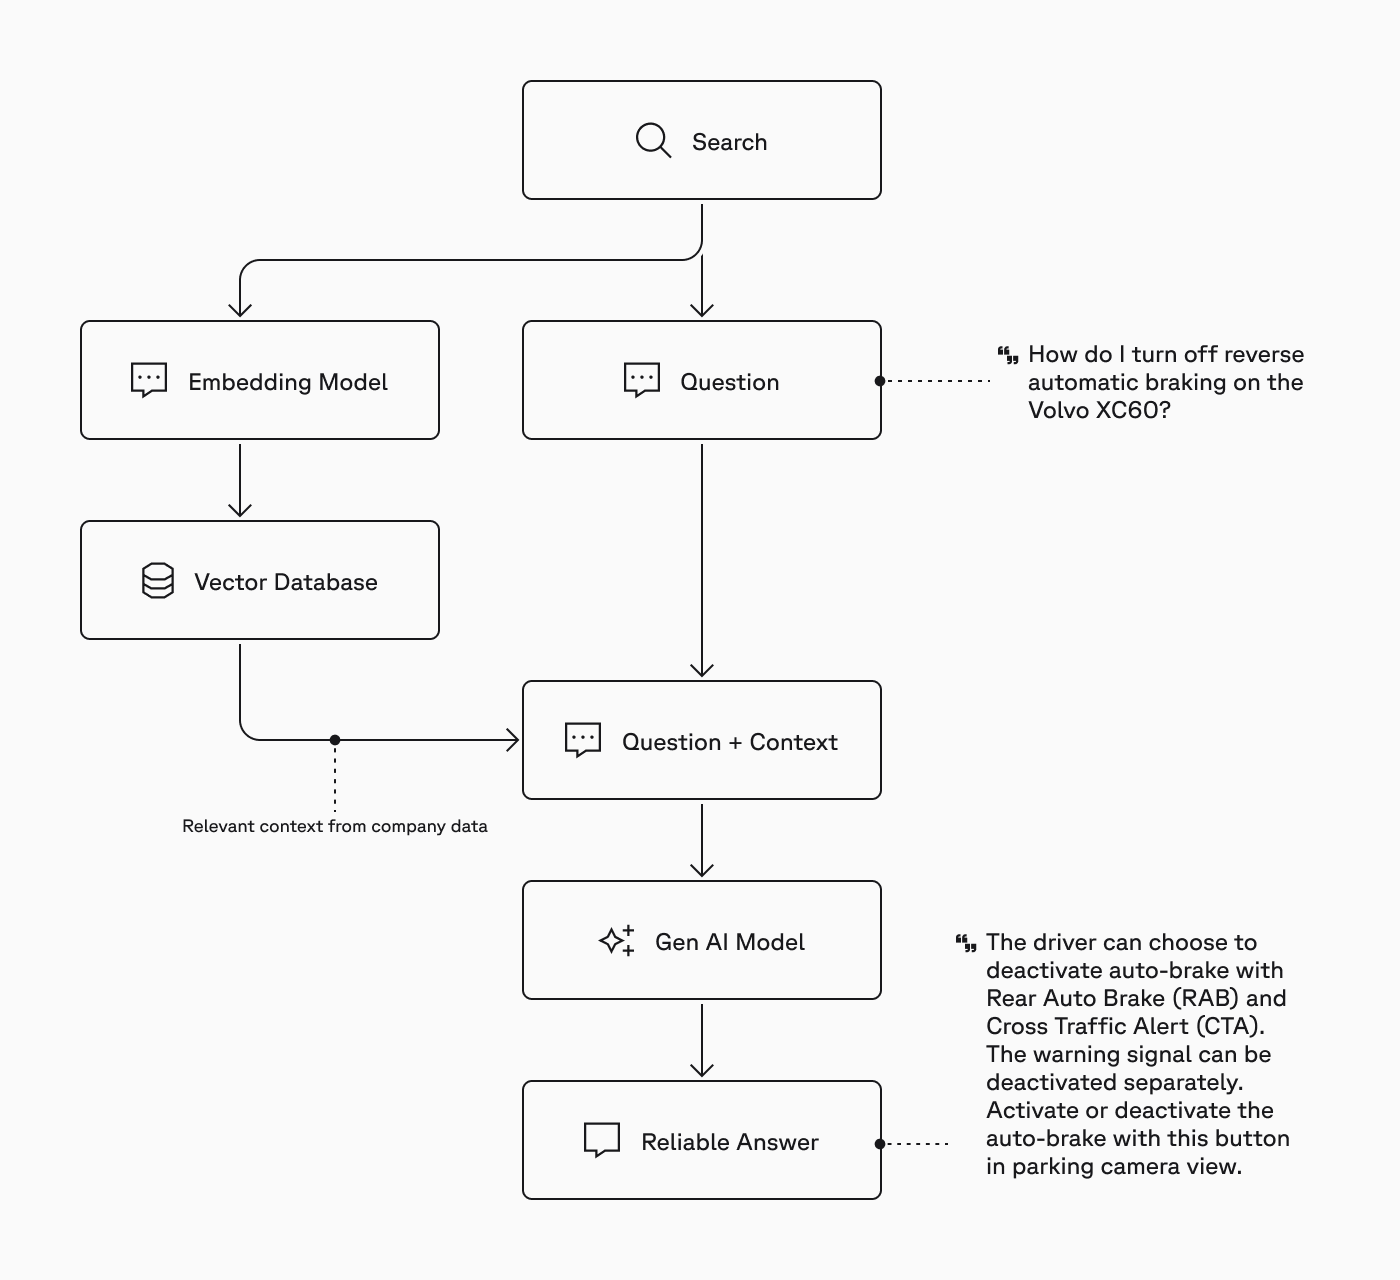

## Before you begin

Ensure you have the following:

- A [Pinecone account](https://app.pinecone.io/) and API key.  

- An [OpenAI account](https://platform.openai.com/) and API key.

## Set up your environment

Install the LangChain libraries required for this notebook:

In [ ]:
!pip install -qU \
    langchain-pinecone==0.2.13 \
    langchain-openai==0.3.0 \
    langchain-text-splitters==0.3.5 \
    langchain==0.3.14 \
    pinecone-notebooks==0.1.1

Set environment variables for your Pinecone and OpenAI API keys:

In [ ]:
import os
import time
from getpass import getpass

# Retrieve an OpenAI API key (available at platform.openai.com/api-keys)
os.environ["OPENAI_API_KEY"] = os.environ.get("OPENAI_API_KEY") or getpass(
    "Enter your OpenAI API key: "
)

# Initialize connection to Pinecone (or get API key at app.pinecone.io)
if not os.environ.get("PINECONE_API_KEY"):
    from pinecone_notebooks.colab import Authenticate

    Authenticate()

## Store knowledge in Pinecone

For this guide, you'll use a document about a fictional product called the WonderVector5000 that LLMs do not have any information about. You'll use LangChain to chunk the document into smaller segments, convert each segment into vectors using, and then upsert your vectors into your Pinecone index.


<details>
  <summary>Browse the document</summary>

```
# The WonderVector5000: A Journey into Absurd Innovation

## Introduction

Welcome to the whimsical world of the WonderVector5000, an astonishing leap into the realms of imaginative technology. This extraordinary device, borne of creative fancy, promises to revolutionize absolutely nothing while dazzling you with its fantastical features. Whether you're a seasoned technophile or just someone looking for a bit of fun, the WonderVector5000 is sure to leave you amused and bemused in equal measure. Let’s explore the incredible, albeit entirely fictitious, specifications, setup process, and troubleshooting tips for this marvel of modern nonsense.

## Product overview

The WonderVector5000 is packed with features that defy logic and physics, each designed to sound impressive while maintaining a delightful air of absurdity:

- Quantum Flibberflabber Engine: The heart of the WonderVector5000, this engine operates on principles of quantum flibberflabber, a phenomenon as mysterious as it is meaningless. It's said to harness the power of improbability to function seamlessly across multiple dimensions.

- Hyperbolic Singularity Matrix: This component compresses infinite possibilities into a singular hyperbolic state, allowing the device to predict outcomes with 0% accuracy, ensuring every use is a new adventure.

- Aetherial Flux Capacitor: Drawing energy from the fictional aether, this flux capacitor provides unlimited power by tapping into the boundless reserves of imaginary energy fields.

- Multi-Dimensional Holo-Interface: Interact with the WonderVector5000 through its holographic interface that projects controls and information in three-and-a-half dimensions, creating a user experience that's simultaneously futuristic and perplexing.

- Neural Fandango Synchronizer: This advanced feature connects directly to the user's brain waves, converting your deepest thoughts into tangible actions—albeit with results that are whimsically unpredictable.

- Chrono-Distortion Field: Manipulate time itself with the WonderVector5000's chrono-distortion field, allowing you to experience moments before they occur or revisit them in a state of temporal flux.

## Use cases

While the WonderVector5000 is fundamentally a device of fiction and fun, let's imagine some scenarios where it could hypothetically be applied:

- Time Travel Adventures: Use the Chrono-Distortion Field to visit key moments in history or glimpse into the future. While actual temporal manipulation is impossible, the mere idea sparks endless storytelling possibilities.

- Interdimensional Gaming: Engage with the Multi-Dimensional Holo-Interface for immersive, out-of-this-world gaming experiences. Imagine games that adapt to your thoughts via the Neural Fandango Synchronizer, creating a unique and ever-changing environment.

- Infinite Creativity: Harness the Hyperbolic Singularity Matrix for brainstorming sessions. By compressing infinite possibilities into hyperbolic states, it could theoretically help unlock unprecedented creative ideas.

- Energy Experiments: Explore the concept of limitless power with the Aetherial Flux Capacitor. Though purely fictional, the notion of drawing energy from the aether could inspire innovative thinking in energy research.

## Getting started

Setting up your WonderVector5000 is both simple and absurdly intricate. Follow these steps to unleash the full potential of your new device:

1. Unpack the Device: Remove the WonderVector5000 from its anti-gravitational packaging, ensuring to handle with care to avoid disturbing the delicate balance of its components.

2. Initiate the Quantum Flibberflabber Engine: Locate the translucent lever marked “QFE Start” and pull it gently. You should notice a slight shimmer in the air as the engine engages, indicating that quantum flibberflabber is in effect.

3. Calibrate the Hyperbolic Singularity Matrix: Turn the dials labeled "Infinity A" and "Infinity B" until the matrix stabilizes. You’ll know it's calibrated correctly when the display shows a single, stable “∞”.

4. Engage the Aetherial Flux Capacitor: Insert the EtherKey into the designated slot and turn it clockwise. A faint humming sound should confirm that the aetherial flux capacitor is active.

5. Activate the Multi-Dimensional Holo-Interface: Press the button resembling a floating question mark to activate the holo-interface. The controls should materialize before your eyes, slightly out of phase with reality.

6. Synchronize the Neural Fandango Synchronizer: Place the neural headband on your forehead and think of the word “Wonder”. The device will sync with your thoughts, a process that should take just a few moments.

7. Set the Chrono-Distortion Field: Use the temporal sliders to adjust the time settings. Recommended presets include “Past”, “Present”, and “Future”, though feel free to explore other, more abstract temporal states.

## Troubleshooting

Even a device as fantastically designed as the WonderVector5000 can encounter problems. Here are some common issues and their solutions:

- Issue: The Quantum Flibberflabber Engine won't start.

    - Solution: Ensure the anti-gravitational packaging has been completely removed. Check for any residual shards of improbability that might be obstructing the engine.

- Issue: The Hyperbolic Singularity Matrix displays “∞∞”.

    - Solution: This indicates a hyper-infinite loop. Reset the dials to zero and then adjust them slowly until the display shows a single, stable infinity symbol.

- Issue: The Aetherial Flux Capacitor isn't engaging.

    - Solution: Verify that the EtherKey is properly inserted and genuine. Counterfeit EtherKeys can often cause malfunctions. Replace with an authenticated EtherKey if necessary.

- Issue: The Multi-Dimensional Holo-Interface shows garbled projections.

    - Solution: Realign the temporal resonators by tapping the holographic screen three times in quick succession. This should stabilize the projections.

- Issue: The Neural Fandango Synchronizer causes headaches.

    - Solution: Ensure the headband is properly positioned and not too tight. Relax and focus on simple, calming thoughts to ease the synchronization process.

- Issue: The Chrono-Distortion Field is stuck in the past.

    - Solution: Increase the temporal flux by 5%. If this fails, perform a hard reset by holding down the “Future” slider for ten seconds.
```

</details

Since your document is in Markdown, [chunk the content](https://www.pinecone.io/learn/chunking-strategies/) based on structure to get semantically coherent segments. In this case, `headers_to_split_on` specifies h2 headers as the indicators of where to split.

In [ ]:
from langchain_text_splitters import MarkdownHeaderTextSplitter

markdown_document = "## Introduction\n\nWelcome to the whimsical world of the WonderVector5000, an astonishing leap into the realms of imaginative technology. This extraordinary device, borne of creative fancy, promises to revolutionize absolutely nothing while dazzling you with its fantastical features. Whether you're a seasoned technophile or just someone looking for a bit of fun, the WonderVector5000 is sure to leave you amused and bemused in equal measure. Let's explore the incredible, albeit entirely fictitious, specifications, setup process, and troubleshooting tips for this marvel of modern nonsense.\n\n## Product overview\n\nThe WonderVector5000 is packed with features that defy logic and physics, each designed to sound impressive while maintaining a delightful air of absurdity:\n\n- Quantum Flibberflabber Engine: The heart of the WonderVector5000, this engine operates on principles of quantum flibberflabber, a phenomenon as mysterious as it is meaningless. It's said to harness the power of improbability to function seamlessly across multiple dimensions.\n\n- Hyperbolic Singularity Matrix: This component compresses infinite possibilities into a singular hyperbolic state, allowing the device to predict outcomes with 0% accuracy, ensuring every use is a new adventure.\n\n- Aetherial Flux Capacitor: Drawing energy from the fictional aether, this flux capacitor provides unlimited power by tapping into the boundless reserves of imaginary energy fields.\n\n- Multi-Dimensional Holo-Interface: Interact with the WonderVector5000 through its holographic interface that projects controls and information in three-and-a-half dimensions, creating a user experience that's simultaneously futuristic and perplexing.\n\n- Neural Fandango Synchronizer: This advanced feature connects directly to the user's brain waves, converting your deepest thoughts into tangible actions—albeit with results that are whimsically unpredictable.\n\n- Chrono-Distortion Field: Manipulate time itself with the WonderVector5000's chrono-distortion field, allowing you to experience moments before they occur or revisit them in a state of temporal flux.\n\n## Use cases\n\nWhile the WonderVector5000 is fundamentally a device of fiction and fun, let's imagine some scenarios where it could hypothetically be applied:\n\n- Time Travel Adventures: Use the Chrono-Distortion Field to visit key moments in history or glimpse into the future. While actual temporal manipulation is impossible, the mere idea sparks endless storytelling possibilities.\n\n- Interdimensional Gaming: Engage with the Multi-Dimensional Holo-Interface for immersive, out-of-this-world gaming experiences. Imagine games that adapt to your thoughts via the Neural Fandango Synchronizer, creating a unique and ever-changing environment.\n\n- Infinite Creativity: Harness the Hyperbolic Singularity Matrix for brainstorming sessions. By compressing infinite possibilities into hyperbolic states, it could theoretically help unlock unprecedented creative ideas.\n\n- Energy Experiments: Explore the concept of limitless power with the Aetherial Flux Capacitor. Though purely fictional, the notion of drawing energy from the aether could inspire innovative thinking in energy research.\n\n## Getting started\n\nSetting up your WonderVector5000 is both simple and absurdly intricate. Follow these steps to unleash the full potential of your new device:\n\n1. Unpack the Device: Remove the WonderVector5000 from its anti-gravitational packaging, ensuring to handle with care to avoid disturbing the delicate balance of its components.\n\n2. Initiate the Quantum Flibberflabber Engine: Locate the translucent lever marked “QFE Start” and pull it gently. You should notice a slight shimmer in the air as the engine engages, indicating that quantum flibberflabber is in effect.\n\n3. Calibrate the Hyperbolic Singularity Matrix: Turn the dials labeled 'Infinity A' and 'Infinity B' until the matrix stabilizes. You'll know it's calibrated correctly when the display shows a single, stable “∞”.\n\n4. Engage the Aetherial Flux Capacitor: Insert the EtherKey into the designated slot and turn it clockwise. A faint humming sound should confirm that the aetherial flux capacitor is active.\n\n5. Activate the Multi-Dimensional Holo-Interface: Press the button resembling a floating question mark to activate the holo-interface. The controls should materialize before your eyes, slightly out of phase with reality.\n\n6. Synchronize the Neural Fandango Synchronizer: Place the neural headband on your forehead and think of the word “Wonder”. The device will sync with your thoughts, a process that should take just a few moments.\n\n7. Set the Chrono-Distortion Field: Use the temporal sliders to adjust the time settings. Recommended presets include “Past”, “Present”, and “Future”, though feel free to explore other, more abstract temporal states.\n\n## Troubleshooting\n\nEven a device as fantastically designed as the WonderVector5000 can encounter problems. Here are some common issues and their solutions:\n\n- Issue: The Quantum Flibberflabber Engine won't start.\n\n    - Solution: Ensure the anti-gravitational packaging has been completely removed. Check for any residual shards of improbability that might be obstructing the engine.\n\n- Issue: The Hyperbolic Singularity Matrix displays “∞∞”.\n\n    - Solution: This indicates a hyper-infinite loop. Reset the dials to zero and then adjust them slowly until the display shows a single, stable infinity symbol.\n\n- Issue: The Aetherial Flux Capacitor isn't engaging.\n\n    - Solution: Verify that the EtherKey is properly inserted and genuine. Counterfeit EtherKeys can often cause malfunctions. Replace with an authenticated EtherKey if necessary.\n\n- Issue: The Multi-Dimensional Holo-Interface shows garbled projections.\n\n    - Solution: Realign the temporal resonators by tapping the holographic screen three times in quick succession. This should stabilize the projections.\n\n- Issue: The Neural Fandango Synchronizer causes headaches.\n\n    - Solution: Ensure the headband is properly positioned and not too tight. Relax and focus on simple, calming thoughts to ease the synchronization process.\n\n- Issue: The Chrono-Distortion Field is stuck in the past.\n\n    - Solution: Increase the temporal flux by 5%. If this fails, perform a hard reset by holding down the “Future” slider for ten seconds."

headers_to_split_on = [("##", "Header 2")]

markdown_splitter = MarkdownHeaderTextSplitter(
    headers_to_split_on=headers_to_split_on, strip_headers=False
)
md_header_splits = markdown_splitter.split_text(markdown_document)

display(md_header_splits)

Initialize a LangChain embedding object. This is what you will use to create vectors from the document above and store them in Pinecone.  Note that this step uses a Pinecone API key you set as an environment variable earlier.

In [ ]:
from langchain_pinecone import PineconeEmbeddings

model_name = "multilingual-e5-large"
embeddings = PineconeEmbeddings(
    model=model_name, pinecone_api_key=os.environ.get("PINECONE_API_KEY")
)

Now create a Pinecone index to store the document in. Define the cloud region and index name and set the index dimensions and distance metric to match those of the Pinecone `multilingual-e5-large model` you'll use to create the embeddings:

In [ ]:
from pinecone import Pinecone, ServerlessSpec

pc = Pinecone(api_key=os.environ.get("PINECONE_API_KEY"))

cloud = os.environ.get("PINECONE_CLOUD") or "aws"
region = os.environ.get("PINECONE_REGION") or "us-east-1"
spec = ServerlessSpec(cloud=cloud, region=region)

index_name = "rag-getting-started"

if not pc.has_index(index_name):
    pc.create_index(
        name=index_name, dimension=embeddings.dimension, metric="cosine", spec=spec
    )
    # Wait for index to be ready
    while not pc.describe_index(index_name).status["ready"]:
        time.sleep(1)

# See that it is empty
pc.Index(index_name).describe_index_stats()

Embed and upsert each chunk as a distinct record in a namespace called `wondervector5000`. Namespaces let you partition records within an index and are essential for [implementing multitenancy](https://docs.pinecone.io/guides/index-data/implement-multitenancy) when you need to isolate the data of each customer/user.

In [ ]:
from langchain_pinecone import PineconeVectorStore

namespace = "wondervector5000"

docsearch = PineconeVectorStore.from_documents(
    documents=md_header_splits,
    index_name=index_name,
    embedding=embeddings,
    namespace=namespace,
)

time.sleep(5)

# See how many vectors have been uploaded
pc.Index(index_name).describe_index_stats()

Use Pinecone's `list` and `query` operations to look at one of the records:

In [ ]:
index = pc.Index(index_name)

for ids in index.list(namespace=namespace):
    query = index.query(
        id=ids[0],
        namespace=namespace,
        top_k=1,
        include_values=False,
        include_metadata=True,
    )
    print(query)

## Use the chatbot

Now that your document is stored as embeddings in Pinecone, when you send questions to the LLM, you can add relevant knowledge from your Pinecone index to ensure that the LLM returns an accurate response.

OpenAI is a paid service, so running the remainder of this guide may incur some small cost.

Initialize a LangChain object for interacting with the `gpt-4o-mini` LLM:

In [ ]:
from langchain import hub
from langchain.chains import create_retrieval_chain
from langchain.chains.combine_documents import create_stuff_documents_chain
from langchain_openai import ChatOpenAI

retrieval_qa_chat_prompt = hub.pull("langchain-ai/retrieval-qa-chat")
retriever = docsearch.as_retriever()

llm = ChatOpenAI(
    openai_api_key=os.environ.get("OPENAI_API_KEY"),
    model_name="gpt-4o-mini",
    temperature=0.0,
)

combine_docs_chain = create_stuff_documents_chain(llm, retrieval_qa_chat_prompt)
retrieval_chain = create_retrieval_chain(retriever, combine_docs_chain)

Define a few questions about the WonderVector5000. These questions require specific, private knowledge of the product, which the LLM does not have by default.

In [ ]:
query1 = "What are the first 3 steps for getting started with the WonderVector5000?"

query2 = "The Neural Fandango Synchronizer is giving me a headache. What do I do?"

Send `query1` to the LLM _without_ relevant context from Pinecone:

In [ ]:
answer1_without_knowledge = llm.invoke(query1)

print("Query 1:", query1)
print("Answer without knowledge:", answer1_without_knowledge.content)

Notice that this first response sounds convincing but is entirely fabricated. This is an hallucination.

Try again, but this time provide the right context from Pinecone:

In [ ]:
answer1_with_knowledge = retrieval_chain.invoke({"input": query1})

print("Query 1:", query1)
print("Answer with knowledge:", answer1_with_knowledge["answer"])
print("\n")
print("Context Used:", answer1_with_knowledge["context"])

Notice that this second response provides very accurate getting started steps, matching closely the information in the WonderVector5000 document.

Now repeat the process with `query2`:

In [ ]:
answer2_without_knowledge = llm.invoke(query2)

print("Query 2:", query2)
print("Answer without knowledge:\n", answer2_without_knowledge.content)

Again, notice how this first response sounds convincing but is entirely fabricated.  This is an hallucination.

Try again, but this time provide the right contexst from Pinecone:

In [ ]:
answer2_with_knowledge = retrieval_chain.invoke({"input": query2})

print("Query 2:", query2)
print("Answer with knowledge:\n", answer2_with_knowledge["answer"])
print("\n")
print("Context Used:", answer2_with_knowledge["context"])

Notice that this second response provides very accurate troubleshooting guidance, matching closely the information in the WonderVector5000 document.

## Clean Up

When you no longer need the “rag-getting-started” index, use the delete_index operation to delete it:

In [ ]:
pc.delete_index(index_name)

After you delete an index, you cannot use it again or recover it.

## Next steps

- Learn more about RAG:
    - [Intro to Retrieval Augmented Generation](https://www.pinecone.io/learn/retrieval-augmented-generation/)
    - [Retrieval Augmented Generation: The Missing Manual](https://www.pinecone.io/learn/series/rag/)
    - [Chunking strategies for LLM applications](https://www.pinecone.io/learn/chunking-strategies/)

- RAG sample app:
    - [Build a multi-tenant RAG sample app](https://docs.pinecone.io/examples/sample-apps/namespace-notes)

- RAG notebooks:
    - [Build a RAG chatbot with LangChain notebook](https://github.com/pinecone-io/examples/blob/master/learn/generation/langchain/rag-chatbot.ipynb)
    - [Create retrieval pipelines with reranking](https://github.com/pinecone-io/examples/blob/master/learn/generation/better-rag/00-rerankers.ipynb)
    - [Common chunking methods](https://github.com/pinecone-io/examples/blob/master/learn/generation/better-rag/02a-alt-chunking-methods.ipynb)
    - [Semantic chunking](https://github.com/pinecone-io/examples/blob/master/learn/generation/better-rag/02b-semantic-chunking.ipynb)
